In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('output/csv/output.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article name  4023 non-null   object
 1   reference     4023 non-null   object
 2   text          4015 non-null   object
 3   method        4023 non-null   object
 4   origin        4023 non-null   object
 5   page number   4023 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 188.7+ KB


In [21]:
def extract_title(text):
    if isinstance(text, str):
        lines = text.split('\n')
        for line in lines[:10]:
            if line.lower().startswith('title'):
                return line
        return None
    else:
        return None

In [22]:
def wordcount(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

In [23]:
df['wordcount'] = df['text'].apply(wordcount)

In [24]:
df['title'] = df['text'].apply(extract_title)

In [25]:
def label_duplicates(df, col_to_check):
    df['is_duplicate'] = df.duplicated(col_to_check, keep=False)
    df['duplicate_group'] = np.where(df['is_duplicate'], df[col_to_check], np.nan)
    df['duplicate_group'] = df['duplicate_group'].factorize(na_sentinel=-1)[0]
    df['duplicate_group'] = np.where(df['duplicate_group'] == -1, np.nan, df['duplicate_group'])
    return df

# Call the function on your DataFrame
df = label_duplicates(df, 'text')

<AxesSubplot: ylabel='Frequency'>

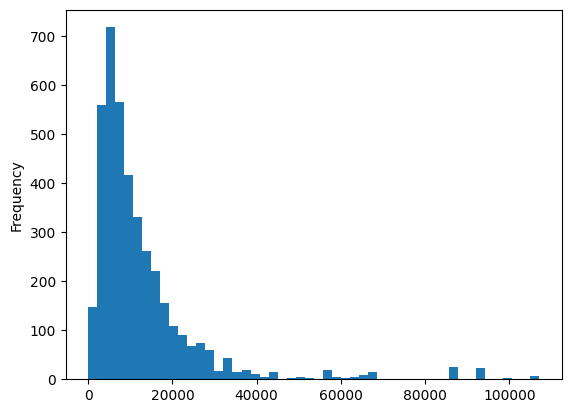

In [26]:
df.wordcount.plot(kind='hist', bins=50)

In [28]:
# TODO:
# Landscape - gives backwards text
# OCR mixed - pdfs with mix of pdf text and scanned documents


In [27]:
df.loc[18].text

'no\nsucof\not\nspuorg\ndna\nseussi\nyeK\n/\nnoitacifitsuJ\necneffo\ntnemssessA\ntcapmI\noN\nderiuqeR\neciton\nlluF seY\nytlanep\not\nesnopseR gnineercS snoitseuQ oN\ndexif\nseY\na\ngnivird\nsselerac\ngnineercS\ngnikam\ntnemssessA\nredisnoc\nsnoitseuQ\ntcapmI\not\nnoitatlusnoc\ngnineercS\nyrotalugeR\nRegulatory\nAgnivird fo gniniart yeht osla dna ecilop\nstruoc ycneiciffe gnireviled sreciffo truoc ot yam dettimbus fo noitanibmoc\necnerreted\nyehT evom etagitsevni reffo tnemecrofne\nnoitucesorp sa\n– eht\nsselerac ssecorp eht ecruoser laidemer gnidneffo gnidnetta no ecneffo\n.noitpo ecilop nedrub yna na .eciton taht\nhguorht eht fo ,egatoof hguorht\n.sredneffo\necrofne tnerruc dna dna evorpmi wolla yaw level lasopsid fo dohtem taht dna eht woh ytlanep ot ,sredir ytlanep era ycilop fo ni dna\ndesingocer redisnoc level\ndetucesorp citarcuaerub struoc emit gnicuder mac-hsad ruoivaheb stsoc\neht dna wol krowrepap dexif\not ot level evitceffe elpmis fo dna dexif siht eht\nstsixe tuB era emig

In [29]:
df.origin.value_counts()

uk      3920
nisr     103
Name: origin, dtype: int64

In [30]:
df.method.value_counts()

pdfplumber                      3796
OCR                              219
PDFSyntaxError                     7
Possible error or blank page       1
Name: method, dtype: int64

In [33]:
df

,article name,reference,text,method,origin,page number,wordcount,title,is_duplicate,duplicate_group
0,The Motor Vehicles (Driving Licences) (Amendme...,ukia_20230067_en.pdf,Title: Extension to the period of time during ...,pdfplumber,uk,1,16797,Title: Extension to the period of time during ...,False,NaN
1,Impact Assessment of The Industrial Training L...,ukia_20230066_en.pdf,Impact Assessment of\nThe Industrial Training\...,pdfplumber,uk,1,7341,None,False,NaN
2,The Republic of Belarus (Sanctions) (EU Exit) ...,ukia_20230065_en.pdf,OFFICIAL\nTitle:The Republic of Belarus (Sanct...,pdfplumber,uk,1,17258,Title:The Republic of Belarus (Sanctions) (EU ...,False,NaN
3,The Pensions Dashboards (Amendment) Regulation...,ukia_20230064_en.pdf,Title: Pensions Dashboards Impact Assessment (...,pdfplumber,uk,1,16761,Title: Pensions Dashboards Impact Assessment (...,False,NaN
4,The Immigration and Nationality (Fees) (Amendm...,ukia_20230063_en.pdf,"Impact Assessment, The Home Office\nTitle: Imp...",pdfplumber,uk,1,16721,Title: Impact assessment for Immigration and D...,False,NaN
...,...,...,...,...,...,...,...,...,...,...
4018,Impact Assessment of widening the scope of aut...,ukia_20070003_en.pdf,Summary: Intervention & Options\nDepartment /A...,pdfplumber,uk,201,4347,None,False,NaN
4019,Impact Assessment of the decision to allow spe...,ukia_20070002_en.pdf,Summary: Intervention & Options\nDepartment /A...,pdfplumber,uk,201,2094,None,False,NaN
4020,Impact Assessment of THE MEDICAL DEVICES ( FEE...,ukia_20070001_en.pdf,Summary: Intervention & Options\n\nDepartment ...,OCR,uk,202,2401,None,False,NaN
4021,Regulatory Impact Assessment (RIA): Authorised...,ukia_20060002_en.pdf,Regulatory Impact Assessment (RIA):\nAuthorise...,pdfplumber,uk,202,1734,Title of proposal,False,NaN


In [34]:
no_duplicates = df.drop_duplicates('text')

In [39]:
len(no_duplicates)

3149

In [38]:
no_duplicates.duplicate_group.isnull().sum()

2620

In [37]:
no_duplicates.duplicate_group.value_counts()

0.0      1
348.0    1
362.0    1
361.0    1
360.0    1
        ..
171.0    1
170.0    1
169.0    1
168.0    1
528.0    1
Name: duplicate_group, Length: 529, dtype: int64

In [32]:
df[df['text'].duplicated(keep=False)]

,article name,reference,text,method,origin,page number,wordcount,title,is_duplicate,duplicate_group
10,The Energy Bills Discount Scheme (Northern Ire...,ukia_20230057_en.pdf,Title: Energy Bills Discount Scheme (EBDS) Imp...,pdfplumber,uk,1,9255,Title: Energy Bills Discount Scheme (EBDS) Imp...,True,0.0
11,The Energy Bills Discount Scheme Pass-through ...,ukia_20230056_en.pdf,Title: Energy Bills Discount Scheme (EBDS) Imp...,pdfplumber,uk,1,9255,Title: Energy Bills Discount Scheme (EBDS) Imp...,True,0.0
12,The Energy Bills Discount Scheme Pass-through ...,ukia_20230055_en.pdf,Title: Energy Bills Discount Scheme (EBDS) Imp...,pdfplumber,uk,1,9255,Title: Energy Bills Discount Scheme (EBDS) Imp...,True,0.0
13,The Energy Bills Discount Scheme (Non-Standard...,ukia_20230054_en.pdf,Title: Energy Bills Discount Scheme (EBDS) Imp...,pdfplumber,uk,1,9255,Title: Energy Bills Discount Scheme (EBDS) Imp...,True,0.0
14,The Energy Bills Discount Scheme Regulations 2023,ukia_20230053_en.pdf,Title: Energy Bills Discount Scheme (EBDS) Imp...,pdfplumber,uk,1,9255,Title: Energy Bills Discount Scheme (EBDS) Imp...,True,0.0
...,...,...,...,...,...,...,...,...,...,...
4005,Planning Bill: Impact Assessment of proposal t...,ukia_20070016_en.pdf,Planning Bill – Impact Assessment\nwww.communi...,pdfplumber,uk,201,57098,None,True,528.0
4006,Planning Bill: Impact Assessment of establishi...,ukia_20070015_en.pdf,Planning Bill – Impact Assessment\nwww.communi...,pdfplumber,uk,201,57098,None,True,528.0
4008,Planning Bill: Impact Assessment of amending s...,ukia_20070013_en.pdf,Planning Bill – Impact Assessment\nwww.communi...,pdfplumber,uk,201,57098,None,True,528.0
4014,Housing and Regeneration Bill: Impact Assessme...,ukia_20070007_en.pdf,Housing and Regeneration Bill – Impact Assessm...,pdfplumber,uk,201,86994,None,True,525.0


In [16]:
df['method'].value_counts()

pdfplumber                      3796
OCR                              219
PDFSyntaxError                     7
Possible error or blank page       1
Name: method, dtype: int64

In [17]:
df['origin'].value_counts()

uk      3920
nisr     103
Name: origin, dtype: int64